In [1]:
import numpy as np
import matplotlib.pyplot as plt

# data size
N = 50

def getRealVal(x):
    t = np.copy(x)
    for i in t:
        i = i/2
    return t

# generate original data
X_data = np.random.uniform(0,1,N)
t_data = getRealVal(X_data) + np.random.uniform(-0.2,0.2,N)
x = np.arange(0, 1, 0.01)

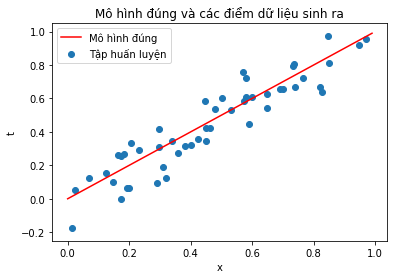

In [2]:
# plot original data
plt.title('Mô hình đúng và các điểm dữ liệu sinh ra')
plt.xlabel('x')
plt.ylabel('t')
plt.plot(x, getRealVal(x), c='r', label='Mô hình đúng')
plt.scatter(X_data, t_data, label='Tập huấn luyện')
plt.legend()
plt.show()

In [3]:
# tranform X_data
def transformX(X):
    new_X = np.empty((0,2))
    for i in range(N):
        new_X = np.append(new_X, np.array([[1, X[i]]]), 0)
    return new_X

# calculate cost
def calCost(X, t, w, B):
    return np.sum((t.reshape(B,1) - np.dot(X, w.reshape(2,1))**2)/(2*B))

# run gradient descent
def gradientDescent(X, t, w, B):
    cost_log = np.empty((0))
    new_X = np.copy(X)
    new_t = np.copy(t)
    idx = np.arange(B)
    i = 0

    while True:
        np.random.shuffle(idx)
        new_X = new_X[idx]
        new_t = new_t[idx]
        gradient = np.dot(new_X.T, np.dot(new_X, w.reshape(2,1)) - new_t.reshape(B,1))/B
        w = w.reshape(2,1) - lr*gradient
        cost_log = np.append(cost_log, calCost(new_X, new_t, w, B))
        if i > 0:
            delta_cost = abs(cost_log[i] - cost_log[i - 1])
            # stop condition
            if delta_cost <= 10**-6:
                return w, cost_log
        i += 1

# get predict value
def getPrediction(X, w):
    return [w[0] + w[1]*x for x in X]

In [4]:
# init w
w = np.array([0, 0])

# learning rate
lr = 0.1

[[-0.01702455]
 [ 0.99711901]]


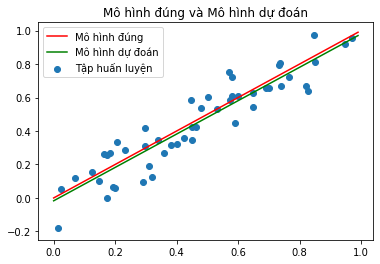

In [5]:
# transform X_data
X_ = transformX(X_data)

# gradient descent
(last_w, cost_log) = gradientDescent(X_, t_data, w, N)
print(last_w)

# plot the result
plt.title('Mô hình đúng và Mô hình dự đoán')
plt.scatter(X_data, t_data, label='Tập huấn luyện')
plt.plot(x, getRealVal(x), c='r', label='Mô hình đúng')
plt.plot(x, getPrediction(x, last_w), c='g', label='Mô hình dự đoán')
plt.legend()
plt.show()